In [1]:
import pandas as pd
import numpy as np
import networkx as nx

# Open ratings.csv file
ratings = pd.read_csv('ratings.csv')

In [2]:
# Open movies.csv file
movies = pd.read_csv("movies.csv")

In [3]:
# Merge ratings and movies
user_movie_matrix = pd.merge(ratings, movies, on="movieId")
print(user_movie_matrix.head())

   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


In [4]:
mapping_score = {
    0.5:-1,
    1:-1,
    1.5:-0.5,
    2:0,
    2.5:0,
    3:0,
    3.5:0.5,
    4:1,
    4.5:1.1,
    5:1.2
}

In [5]:
import networkx as nx

user_movie_graph = nx.Graph()

for _, row in user_movie_matrix.iterrows():
    user_movie_graph.add_node(row["userId"], bipartite=0)
    user_movie_graph.add_node(row["title"], bipartite=1, genre=row["genres"], movieId=row["movieId"])
    user_movie_graph.add_edge(row["userId"], row["title"], weight=mapping_score[row["rating"]])

Nodes in the graph: [(1, {'bipartite': 0}), ('Toy Story (1995)', {'bipartite': 1, 'genre': 'Adventure|Animation|Children|Comedy|Fantasy', 'movieId': 1}), ('Grumpier Old Men (1995)', {'bipartite': 1, 'genre': 'Comedy|Romance', 'movieId': 3}), ('Heat (1995)', {'bipartite': 1, 'genre': 'Action|Crime|Thriller', 'movieId': 6}), ('Seven (a.k.a. Se7en) (1995)', {'bipartite': 1, 'genre': 'Mystery|Thriller', 'movieId': 47}), ('Usual Suspects, The (1995)', {'bipartite': 1, 'genre': 'Crime|Mystery|Thriller', 'movieId': 50}), ('From Dusk Till Dawn (1996)', {'bipartite': 1, 'genre': 'Action|Comedy|Horror|Thriller', 'movieId': 70}), ('Bottle Rocket (1996)', {'bipartite': 1, 'genre': 'Adventure|Comedy|Crime|Romance', 'movieId': 101}), ('Braveheart (1995)', {'bipartite': 1, 'genre': 'Action|Drama|War', 'movieId': 110}), ('Rob Roy (1995)', {'bipartite': 1, 'genre': 'Action|Drama|Romance|War', 'movieId': 151})]
Edges in the graph: [(1, 'Toy Story (1995)', {'weight': 1}), (1, 'Grumpier Old Men (1995)', {

In [ ]:
print(f"Nodes in the graph: {list(user_movie_graph.nodes(data=True))[:10]}")
print(f"Edges in the graph: {list(user_movie_graph.edges(data=True))[:10]}")

In [6]:
users = {n for n, d in user_movie_graph.nodes(data=True) if d["bipartite"] == 0}
print(f"Users: {list(users)[:10]}")
print(f"Number of users: {len(users)}")

Users: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Number of users: 610


In [7]:
movies = {n for n, d in user_movie_graph.nodes(data=True) if d["bipartite"] == 1}
print(f"Movies: {list(movies)[:10]}")
print(f"Number of movies: {len(movies)}")

Movies: ['Asterix: The Land of the Gods (Astérix: Le domaine des dieux) (2014)', 'The Fox and the Hound 2 (2006)', 'Wolf (1994)', 'Blue Valentine (2010)', 'Den, The (2013)', 'Siam Sunset (1999)', 'Loose Cannons (1990)', 'My Girl (1991)', 'Zeitgeist: Addendum (2008)', 'Barcelona (1994)']
Number of movies: 9719


In [8]:
print(nx.is_bipartite(user_movie_graph))
print(nx.is_connected(user_movie_graph))

True
True


In [9]:
user_user_graph = nx.bipartite.weighted_projected_graph(user_movie_graph, users)


Nodes in the user-user graph: [(1, {'bipartite': 0}), (2, {'bipartite': 0}), (3, {'bipartite': 0}), (4, {'bipartite': 0}), (5, {'bipartite': 0}), (6, {'bipartite': 0}), (7, {'bipartite': 0}), (8, {'bipartite': 0}), (9, {'bipartite': 0}), (10, {'bipartite': 0})]
Edges in the user-user graph: [(1, 2, {'weight': 2}), (1, 3, {'weight': 7}), (1, 4, {'weight': 45}), (1, 5, {'weight': 13}), (1, 6, {'weight': 33}), (1, 7, {'weight': 26}), (1, 8, {'weight': 15}), (1, 9, {'weight': 5}), (1, 10, {'weight': 6}), (1, 11, {'weight': 16})]
610
164054


In [ ]:
print(f"Nodes in the user-user graph: {list(user_user_graph.nodes(data=True))[:10]}")
print(len(user_user_graph.nodes()))

In [ ]:
print(f"Edges in the user-user graph: {list(user_user_graph.edges(data=True))[:10]}")
print(len(user_user_graph.edges()))

In [12]:
print(f"Edges in the user-user graph: {list(user_user_graph.edges(data=True))[:10]}")

Edges in the user-user graph: [(1, 2, {'weight': 2}), (1, 3, {'weight': 7}), (1, 4, {'weight': 45}), (1, 5, {'weight': 13}), (1, 6, {'weight': 33}), (1, 7, {'weight': 26}), (1, 8, {'weight': 15}), (1, 9, {'weight': 5}), (1, 10, {'weight': 6}), (1, 11, {'weight': 16})]


In [14]:
print(len(user_user_graph.edges()))

164054


In [15]:
# Controllo dei pesi degli archi nel grafo user-user
def analyze_user_user_edge_weights(user_user_graph: nx.Graph, expected_total_edges: int):
    edge_weights = [data['weight'] for u, v, data in user_user_graph.edges(data=True)]

    print(f"Range dei pesi degli archi user-user: min={min(edge_weights)}, max={max(edge_weights)}")

    weight_dict = {}
    for weight in edge_weights:
        if weight in weight_dict:
            weight_dict[weight] += 1
        else:
            weight_dict[weight] = 1

    print("Distribuzione dei pesi degli archi user-user:")
    for weight, count in sorted(weight_dict.items()):
        print(f"Peso: {weight}, Numero di archi: {count}")

    total_non_zero = sum(count for weight, count in weight_dict.items() if weight != 0.0)
    print(f"Numero di archi con peso diverso da zero: {total_non_zero}")

    actual_total_edges = len(edge_weights)
    print(f"Numero totale di archi nel grafo user-user: {actual_total_edges}")
    if actual_total_edges == expected_total_edges:
        print("Il numero totale di archi è corretto.")
    else:
        print(f"ATTENZIONE: Il numero totale di archi è {actual_total_edges}, ma il valore atteso era {expected_total_edges}.")

    return weight_dict, edge_weights

expected_total_edges = 164054
weight_dict, edge_weights = analyze_user_user_edge_weights(user_user_graph, expected_total_edges)

Range dei pesi degli archi user-user: min=1, max=1338
Distribuzione dei pesi degli archi user-user:
Peso: 1, Numero di archi: 18010
Peso: 2, Numero di archi: 14895
Peso: 3, Numero di archi: 12373
Peso: 4, Numero di archi: 10574
Peso: 5, Numero di archi: 9027
Peso: 6, Numero di archi: 7598
Peso: 7, Numero di archi: 6736
Peso: 8, Numero di archi: 6036
Peso: 9, Numero di archi: 5432
Peso: 10, Numero di archi: 4783
Peso: 11, Numero di archi: 4459
Peso: 12, Numero di archi: 4021
Peso: 13, Numero di archi: 3666
Peso: 14, Numero di archi: 3368
Peso: 15, Numero di archi: 3184
Peso: 16, Numero di archi: 2887
Peso: 17, Numero di archi: 2740
Peso: 18, Numero di archi: 2415
Peso: 19, Numero di archi: 2323
Peso: 20, Numero di archi: 2050
Peso: 21, Numero di archi: 1951
Peso: 22, Numero di archi: 1773
Peso: 23, Numero di archi: 1692
Peso: 24, Numero di archi: 1528
Peso: 25, Numero di archi: 1397
Peso: 26, Numero di archi: 1280
Peso: 27, Numero di archi: 1207
Peso: 28, Numero di archi: 1091
Peso: 29,

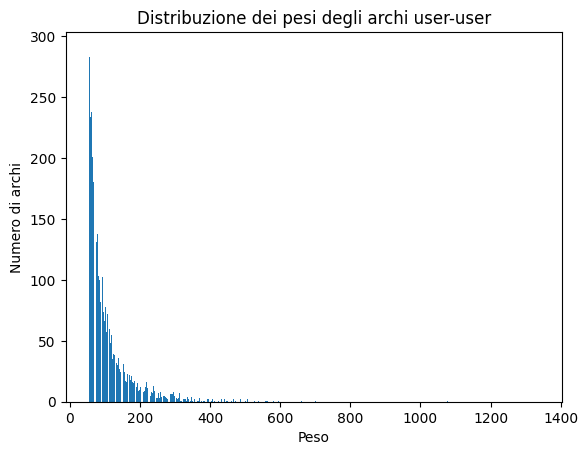

In [36]:
import matplotlib.pyplot as plt

filtered_weight_dict = {}
for k,v in weight_dict.items():
    if v < 300:
      filtered_weight_dict[k] = v

plt.bar(filtered_weight_dict.keys(), filtered_weight_dict.values())
plt.xlabel('Peso')
plt.ylabel('Numero di archi')
plt.title('Distribuzione dei pesi degli archi user-user')
plt.show()

**Link Prediction with Adamic Adar Index**

L'**Adamic-Adar Index** è una misura utilizzata per calcolare la _similarità_ tra due nodi in una rete (o grafo) in base ai loro _vicini comuni_. Questa misura si basa sull'idea che i vicini comuni più _rari_ (cioè quelli con un basso grado) contribuiscano _maggiormente_ alla similarità rispetto a quelli con un alto grado.  [https://neo4j.com/docs/graph-data-science/current/alpha-algorithms/adamic-adar/]

La formula per calcolare l'indice di Adamic-Adar tra due nodi $u$ e $v$ è:

$$
A(u, v) = \sum_{w \in N(u) \cap N(v)} \frac{1}{\log |N(w)|}
$$

Dove:
- $N(u)$ è l'insieme dei vicini del nodo $u$.
- $N(v)$ è l'insieme dei vicini del nodo $v$.
- $N(w)$ è l'insieme dei vicini del nodo $w$ (nodo comune tra $u$ e $v$).
- $|N(w)|$ rappresenta il grado del nodo $w$.

In altre parole, l'indice somma i contributi inversamente proporzionali alla logaritmica del grado dei vicini comuni $w$.

L'Adamic-Adar Index viene ampiamente utilizzato nella **link prediction** nei sistemi di raccomandazione, ad esempio per predire nuovi film che un utente potrebbe apprezzare. Ecco i motivi principali:

1. **Valorizzazione dei vicini rari**:
   - La presenza di vicini comuni rari è considerata più significativa nella formazione di nuovi collegamenti, poiché suggerisce una connessione più forte tra i nodi.
   - Ad esempio, in una rete sociale, avere amici comuni con pochi altri contatti può essere indicativo di una relazione più stretta.

2. **Efficienza computazionale**:
   - L'indice è relativamente semplice da calcolare per coppie di nodi e può essere implementato in modo efficace anche su grandi reti sparse.

3. **Adattabilità a diversi domini**:
   - L'indice si applica bene a reti sociali, biologiche, di co-autorship, e molte altre tipologie di grafo.

4. **Rilevanza statistica**:
   - Penalizzando i nodi con alti gradi ($\log |N(w)|$), l'Adamic-Adar Index riduce l'effetto di "hub" o nodi centrali nella rete, rendendo la misura più bilanciata.

Nella link prediction, l'indice viene utilizzato per stimare la _probabilità_ che un collegamento esista (o si formi in futuro) tra due nodi non direttamente collegati. In particolare:

1. Si calcolano gli indici Adamic-Adar per tutte le coppie di nodi non collegati.
2. Si ordinano le coppie in base ai valori di similarità.
3. Si predice che i collegamenti con i valori più alti abbiano la maggiore probabilità di esistere o di formarsi.

Immaginiamo un grafo con i seguenti nodi e connessioni:
- Nodo $u$ è connesso a $a, b$.
- Nodo $v$ è connesso a $b, c$.

Il vicinato comune tra $u$ e $v$ è costituito dal nodo $b$. Supponendo che $|N(b)| = 10$, il contributo di $b$ all'indice Adamic-Adar sarà:

$$
\frac{1}{\log 10} \approx 0.434
$$

Se ci sono più vicini comuni, i loro contributi saranno sommati per ottenere il valore finale dell'indice.

Nonostante l'efficacia in molti scenari, l'Adamic-Adar Index presenta alcune limitazioni:
- **Bias verso nodi con basso grado**: Questa caratteristica può risultare svantaggiosa in alcune reti dove gli hub giocano un ruolo cruciale.
- **Non considera i pesi degli archi**: La versione standard non tiene conto di pesi o altre proprietà degli archi, che potrebbero essere rilevanti in applicazioni specifiche.


In [21]:
def calculate_adamic_adar(graph):
    scores = []
    for u, v in nx.non_edges(graph):
        common_neighbors = set(nx.common_neighbors(graph, u, v))
        if common_neighbors:
            score = sum(1 / np.log(len(list(graph.neighbors(w)))) for w in common_neighbors)
            type_u = graph.nodes[u].get('bipartite', -1)
            type_v = graph.nodes[v].get('bipartite', -1)
            if type_u == 0 and type_v == 1:  # user-movie
                link_type = "user-movie"
            elif type_u == 1 and type_v == 1:  # movie-movie
                link_type = "movie-movie"
            elif type_u == 0 and type_v == 0:  # user-user (poco probabile nel tuo caso)
                link_type = "user-user"
            else:
                link_type = "unknown"
            scores.append((u, v, score, link_type))
    return scores

adamic_adar_scores = calculate_adamic_adar(user_user_graph)

print("I link predetti sono:", len(adamic_adar_scores))

The link predicted are #  21691
Adamic-Adar scores salvati in 'adamic_adar_scores_user_user.csv'


In [ ]:

# Salva i risultati in un CSV
adamic_adar_df = pd.DataFrame(adamic_adar_scores, columns=["Node u", "Node v", "Score", "LinkType"])
adamic_adar_df.to_csv("adamic_adar_scores_user_user.csv", index=False)

print("Adamic-Adar scores salvati in 'adamic_adar_scores_user_user.csv'")

In [30]:
def analyze_adamic_adar_from_df(adamic_adar_df):
    min_score = adamic_adar_df["Score"].min()
    max_score = adamic_adar_df["Score"].max()
    print(f"Range degli score Adamic-Adar: min={min_score}, max={max_score}")

    adamic_adar_df["RoundedScore"] = adamic_adar_df["Score"].round(2)
    score_distribution = adamic_adar_df["RoundedScore"].astype(int).value_counts().sort_index()

    print("Distribuzione degli score Adamic-Adar:")
    for score, count in score_distribution.items():
        print(f"Score: {score}, Numero di link: {count}")

    return score_distribution

score_distribution = analyze_adamic_adar_from_df(adamic_adar_df)

Range degli score Adamic-Adar: min=9.879585259240814, max=88.57402962234279
Distribuzione degli score Adamic-Adar:
Score: 9, Numero di link: 1
Score: 10, Numero di link: 1
Score: 12, Numero di link: 4
Score: 13, Numero di link: 9
Score: 14, Numero di link: 17
Score: 15, Numero di link: 18
Score: 16, Numero di link: 61
Score: 17, Numero di link: 144
Score: 18, Numero di link: 192
Score: 19, Numero di link: 69
Score: 20, Numero di link: 21
Score: 21, Numero di link: 23
Score: 22, Numero di link: 28
Score: 23, Numero di link: 30
Score: 24, Numero di link: 66
Score: 25, Numero di link: 119
Score: 26, Numero di link: 200
Score: 27, Numero di link: 149
Score: 28, Numero di link: 119
Score: 29, Numero di link: 203
Score: 30, Numero di link: 205
Score: 31, Numero di link: 137
Score: 32, Numero di link: 260
Score: 33, Numero di link: 252
Score: 34, Numero di link: 238
Score: 35, Numero di link: 268
Score: 36, Numero di link: 350
Score: 37, Numero di link: 393
Score: 38, Numero di link: 378
Scor

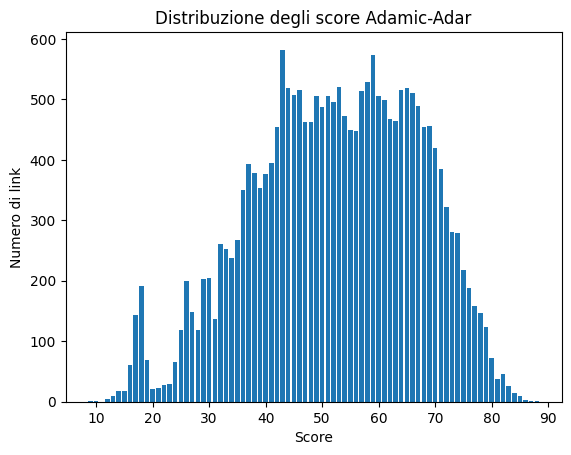

In [31]:
plt.bar(score_distribution.index, score_distribution.values)
plt.xlabel('Score')
plt.ylabel('Numero di link')
plt.title('Distribuzione degli score Adamic-Adar')
plt.show()

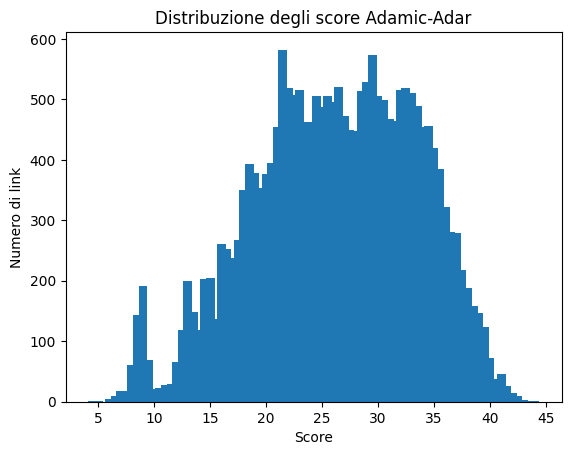

In [39]:
# Resize degli score
plt.bar(score_distribution.index/2, score_distribution.values)
plt.xlabel('Score')
plt.ylabel('Numero di link')
plt.title('Distribuzione degli score Adamic-Adar')
plt.show()

In [26]:
#altri print di debug utili per controllare "calculate_adamic_adar"
print(adamic_adar_df.head())

   Node u  Node v      Score   LinkType
0       1     578  27.100798  user-user
1       1     556  61.756292  user-user
2       1     397  33.213062  user-user
3       1     175  19.113945  user-user
4       1     496  61.782146  user-user


In [21]:
# Aggiunta di link predetti
def add_predicted_links(graph, predicted_edges, threshold):
    for u, v, score in predicted_edges:
        if score > threshold:  #threshold is 50
            graph.add_edge(u, v, weight=score)
    return graph

In [ ]:
user_user_graph_extended = add_predicted_links(user_user_graph, adamic_adar_scores, 50)
# movie_movie_graph_extended = add_predicted_links(movie_movie_graph, adamic_adar_scores, 50)

Questo notebook si ferma alla creazione di un grafo esteso in cui sono inclusi nuovi archi predetti tramite link prediction.
Da qui in poi il grafo è analizzabile con un qualsiasi altro approccio